# **Big Data & Data Mining Final Assignment**

Name       : **Namitha Menon Kakkanat**

Student Id : **202117887**

Course     : **771762_A21_T2-Big Data and Data Mining**

In [78]:
#Mounting Google colab
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [79]:
#Importing Neccessary Libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from datetime import time
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from pandas.core import apply
%matplotlib inline

!pip install astral
from astral import LocationInfo
import datetime
from datetime import timedelta
from astral.sun import sun

from sklearn.feature_selection import SelectKBest, chi2, f_regression, f_classif
from numpy import mean, std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


In [80]:
#Reading the csv files 

accidents19_df=pd.read_csv('gdrive/My Drive/Colab Notebooks/771762_A21_T2-BigDataAndDataMining/Assignment/Road Safety Data - Accidents 2019.csv')
casualties19_df=pd.read_csv('gdrive/My Drive/Colab Notebooks/771762_A21_T2-BigDataAndDataMining/Assignment/Road Safety Data - Casualties 2019.csv')
vehicles19_df=pd.read_csv('gdrive/My Drive/Colab Notebooks/771762_A21_T2-BigDataAndDataMining/Assignment/Road Safety Data- Vehicles 2019.csv')
gov_prediction=pd.read_csv('gdrive/My Drive/Colab Notebooks/771762_A21_T2-BigDataAndDataMining/Assignment/cas_adjustment_lookup_2019 (1).csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [81]:
#Accident-2019 Data Display
accidents19_df

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,3,2,3,18/02/2019,...,0,5,1,1,1,0,0,1,3,E01004762
1,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,3,2,1,15/01/2019,...,-1,-1,4,1,1,0,0,1,3,E01003117
2,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,3,2,1,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000943
3,2019010155192,525531.0,184605.0,-0.191044,51.546387,1,2,1,1,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000973
4,2019010155194,524920.0,184004.0,-0.200064,51.541121,1,3,2,2,01/01/2019,...,0,0,4,1,1,0,0,1,1,E01000546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117531,2019984106919,312635.0,573392.0,-3.368899,55.047323,98,3,1,1,18/05/2019,...,0,0,1,1,2,0,0,2,1,NaN
117532,2019984107019,337522.0,591682.0,-2.983499,55.215407,98,3,4,1,30/05/2019,...,0,0,1,1,2,0,0,2,1,NaN
117533,2019984107219,318544.0,567087.0,-3.274645,54.991685,98,3,2,1,21/06/2019,...,0,0,1,1,1,0,0,2,2,NaN
117534,2019984107419,336525.0,584226.0,-2.997491,55.148292,98,3,1,1,29/06/2019,...,0,0,1,1,1,0,0,2,2,NaN


In [82]:
#Casualites-2019 Data Display
casualties19_df

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2019010128300,1,1,1,1,58,9,3,0,0,0,0,0,9,1,2
1,2019010128300,1,2,2,2,-1,-1,3,0,0,1,0,0,9,1,5
2,2019010128300,1,3,2,2,-1,-1,3,0,0,2,0,0,9,1,5
3,2019010152270,1,1,1,2,24,5,3,0,0,0,0,0,9,1,3
4,2019010155191,2,1,2,2,21,5,3,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153153,2019984106919,1,1,1,1,24,5,3,0,0,0,0,0,19,3,6
153154,2019984107019,1,1,1,1,22,5,3,0,0,0,0,0,19,1,1
153155,2019984107219,2,1,1,1,61,9,3,0,0,0,0,0,9,3,7
153156,2019984107419,1,1,3,1,54,8,3,5,3,0,0,0,0,3,8


In [83]:
#Vehicle-2019 Data Display
vehicles19_df

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2019010128300,1,9,0,-1,-1,-1,-1,-1,-1,...,6,1,58,9,-1,-1,-1,2,1,2
1,2019010128300,2,9,0,-1,-1,-1,-1,-1,-1,...,6,3,-1,-1,-1,-1,-1,2,1,2
2,2019010152270,1,9,0,18,-1,0,-1,-1,-1,...,6,2,24,5,-1,-1,-1,3,1,3
3,2019010152270,2,9,0,18,-1,0,-1,-1,-1,...,6,3,-1,-1,-1,-1,-1,6,1,6
4,2019010155191,1,9,0,3,0,1,0,0,0,...,6,1,45,7,-1,-1,-1,4,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216376,2019984107019,4,19,0,18,0,0,0,0,0,...,1,1,20,4,2198,2,4,5,3,5
216377,2019984107219,1,9,0,18,0,1,0,0,0,...,6,1,33,6,1997,2,12,3,2,3
216378,2019984107219,2,9,0,18,0,1,0,0,0,...,6,1,61,9,2967,2,5,7,3,7
216379,2019984107419,1,9,0,7,0,6,0,0,3,...,5,1,78,11,1597,2,6,8,3,8


In [84]:
#Governement Prediction Data Display
gov_prediction

,accident_index,Vehicle_Reference,Casualty_Reference,Adjusted_Serious,Adjusted_Slight,Injury_Based
0,200401BS00001,1,1,0.239280,0.760720,0
1,200401BS00002,1,1,1.000000,0.000000,0
2,200401BS00003,1,1,0.057141,0.942859,0
3,200401BS00003,1,2,0.048599,0.951401,0
4,200401BS00004,1,1,0.187000,0.813000,0
...,...,...,...,...,...,...
3314732,2019984106919,1,1,0.183336,0.816664,0
3314733,2019984107019,1,1,0.074588,0.925412,0
3314734,2019984107219,2,1,0.048524,0.951476,0
3314735,2019984107419,1,1,0.183316,0.816684,0


In [85]:
#Check for Null values of Accident 2019 Data

accidents19_df.isna()                             #After viewing , LSOA_of_Accident_Location has null values

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117531,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
117532,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
117533,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
117534,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [86]:
#Check for Null values of Casualities 2019 Data

casualties19_df.isna()

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153153,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
153154,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
153155,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
153156,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [87]:
#Check for Null values of Vehicle 2019 Data

vehicles19_df.isna()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216376,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
216377,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
216378,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
216379,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [88]:
#Null values Summary

print(accidents19_df.isnull().sum())

Accident_Index                                    0
Location_Easting_OSGR                            28
Location_Northing_OSGR                           28
Longitude                                        28
Latitude                                         28
Police_Force                                      0
Accident_Severity                                 0
Number_of_Vehicles                                0
Number_of_Casualties                              0
Date                                              0
Day_of_Week                                       0
Time                                             63
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
Junction_Detail                                   0
Junction_Con

# **Data Cleaning**

In [89]:
#Null values correction

minlat = (accidents19_df['Latitude']).min()
minlon = (accidents19_df['Longitude']).min()

#Drop the null values as only 28 null values exist 
accidents19_df["Location_Easting_OSGR"] = accidents19_df["Location_Easting_OSGR"].dropna().reset_index(drop=True) 
accidents19_df["Location_Northing_OSGR"] = accidents19_df["Location_Northing_OSGR"].dropna().reset_index(drop=True)

#Replacing the null values with minimum Lattitude and minimum Longitude
accidents19_df["Longitude"] = accidents19_df["Longitude"].fillna(minlon)
accidents19_df["Latitude"] = accidents19_df["Latitude"].fillna(minlat)

#Replacing the null values in time with default time 00:00
accidents19_df["Time"] = accidents19_df["Time"].fillna('00:00')
accidents19_df=accidents19_df.dropna().reset_index(drop=True)



In [90]:
print(accidents19_df.isnull().sum())

Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control                               0
2nd_Road_Class      

In [91]:
print(vehicles19_df.isnull().sum())

Accident_Index                      0
Vehicle_Reference                   0
Vehicle_Type                        0
Towing_and_Articulation             0
Vehicle_Manoeuvre                   0
Vehicle_Location-Restricted_Lane    0
Junction_Location                   0
Skidding_and_Overturning            0
Hit_Object_in_Carriageway           0
Vehicle_Leaving_Carriageway         0
Hit_Object_off_Carriageway          0
1st_Point_of_Impact                 0
Was_Vehicle_Left_Hand_Drive?        0
Journey_Purpose_of_Driver           0
Sex_of_Driver                       0
Age_of_Driver                       0
Age_Band_of_Driver                  0
Engine_Capacity_(CC)                0
Propulsion_Code                     0
Age_of_Vehicle                      0
Driver_IMD_Decile                   0
Driver_Home_Area_Type               0
Vehicle_IMD_Decile                  0
dtype: int64


In [92]:
print(casualties19_df.isnull().sum())

Accident_Index                        0
Vehicle_Reference                     0
Casualty_Reference                    0
Casualty_Class                        0
Sex_of_Casualty                       0
Age_of_Casualty                       0
Age_Band_of_Casualty                  0
Casualty_Severity                     0
Pedestrian_Location                   0
Pedestrian_Movement                   0
Car_Passenger                         0
Bus_or_Coach_Passenger                0
Pedestrian_Road_Maintenance_Worker    0
Casualty_Type                         0
Casualty_Home_Area_Type               0
Casualty_IMD_Decile                   0
dtype: int64


In [93]:
#Converting the hours of the day in to decimal format for ease of use with seaborn

temp = pd.DatetimeIndex(accidents19_df['Time'])
accidents19_df['Decimal_Time'] = temp.hour + temp.minute/60
accidents19_df['Decimal_Time'] = accidents19_df['Decimal_Time'].astype(float)

#Decimal Time display 
print(accidents19_df[['Time', 'Decimal_Time']].head())

    Time  Decimal_Time
0  17:50     17.833333
1  21:45     21.750000
2  01:50      1.833333
3  01:20      1.333333
4  00:40      0.666667


In [94]:
print(accidents19_df['Decimal_Time'])

0         17.833333
1         21.750000
2          1.833333
3          1.333333
4          0.666667
            ...    
111817    16.483333
111818    11.666667
111819    23.250000
111820    12.833333
111821    15.166667
Name: Decimal_Time, Length: 111822, dtype: float64


# **Visualisation**

(a) **Are there significant hours of the day, and days of the week, on which accidents occur?**

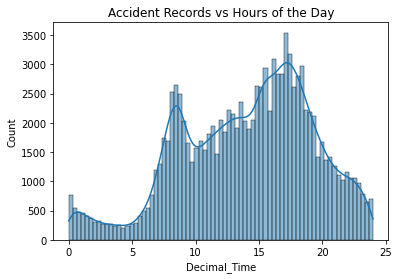

In [96]:
plot_1=sns.histplot(accidents19_df, x="Decimal_Time" ,kde=True).set(title='Accident Records vs Hours of the Day')

[Text(0.5, 1.0, 'Accident Records vs Days of Week')]

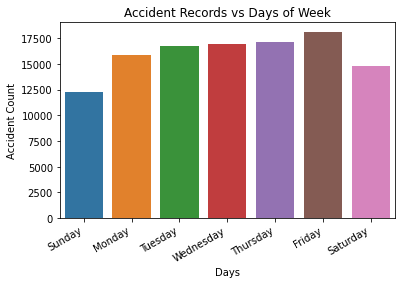

In [101]:
days={1:"Sunday",2:"Monday",3:"Tuesday",4:"Wednesday",5:"Thursday",6:"Friday",7:"Saturday"}
accident_count=[accidents19_df['Accident_Index'][accidents19_df['Day_of_Week']==key].count() for key,values in days.items()]
name=[values for key,values in days.items()]
newDf=pd.DataFrame({'Days':name,'Accident Count':accident_count})

plot_2=sns.barplot(x="Days",y="Accident Count",data=newDf)
plot_2.get_figure().autofmt_xdate()
plot_2.set(title='Accident Records vs Days of Week')

**(b) For motorbikes, are there significant hours of the day, and days of the week, on which accidents occur?**


In [102]:
# Creating New Data Frame by merging both Accident data & Vehicle Data

motor_cycle_df=pd.merge(accidents19_df, vehicles19_df, on='Accident_Index', how='inner')
motor_cycle_df=motor_cycle_df[motor_cycle_df["Vehicle_Type"].isin([2,3,4,5,22,23,97])]  # Filter entire data by Vehicle Type
motor_cycle_df=motor_cycle_df.reset_index()
motor_cycle_df

,index,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,30,2019010155225,512750.0,180199.0,-0.376691,51.509481,1,3,2,1,...,6,1,30,6,-1,-1,-1,4,1,4
1,39,2019010155254,534122.0,189977.0,-0.065175,51.592686,1,3,2,1,...,1,1,19,4,-1,-1,-1,2,1,2
2,41,2019010155255,531638.0,180380.0,-0.104600,51.507028,1,3,1,1,...,6,1,54,8,-1,-1,-1,5,1,5
3,46,2019010155263,538972.0,171167.0,-0.002610,51.422484,1,2,2,1,...,6,1,20,4,-1,-1,-1,4,1,4
4,49,2019010155276,519377.0,184736.0,-0.279706,51.548898,1,2,2,1,...,6,1,65,9,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13977,165581,201963DF02019,179330.0,841224.0,-3.218892,52.220306,63,1,4,2,...,6,1,51,8,998,1,2,8,1,8
13978,165583,201963DF02219,439618.0,1146295.0,-3.171343,52.510111,63,1,2,1,...,6,1,61,9,1100,1,27,5,1,5
13979,165589,201963DF02819,326519.0,1017564.0,-3.231115,52.650472,63,1,3,2,...,6,1,26,6,645,1,13,3,1,3
13980,165595,201963DF03019,217290.0,944273.0,-3.322442,52.335266,63,1,3,2,...,6,1,52,8,749,1,25,7,1,7


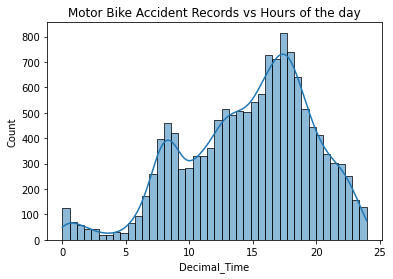

In [103]:
#Visualization of the data
plot_3=sns.histplot(motor_cycle_df, x="Decimal_Time" ,kde=True).set(title='Motor Bike Accident Records vs Hours of the day')

[Text(0.5, 1.0, 'Motor Bike Accident Records vs Days of Week')]

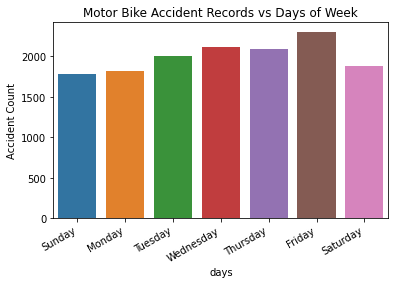

In [104]:
accident_count=[motor_cycle_df['Accident_Index'][motor_cycle_df['Day_of_Week']==key].count() for key,values in days.items()]
name=[values for key,values in days.items()]
newDf=pd.DataFrame({'days':name,'Accident Count':accident_count})

plot_3a=sns.barplot(x="days",y="Accident Count",data=newDf)
plot_3a.get_figure().autofmt_xdate()
plot_3a.set(title='Motor Bike Accident Records vs Days of Week')

**(c) For pedestrians involved in accidents, are there significant hours of the day, and days of the week, on which they are more likely to be involved?**

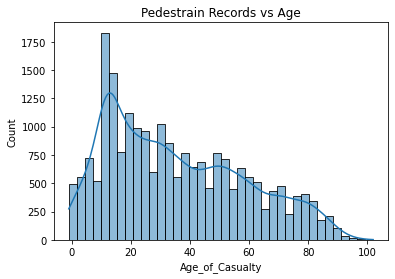

In [105]:
pedestrain=casualties19_df[casualties19_df['Casualty_Class'] == 3] # Class 3 -> Pedestrain
plot_4=sns.histplot(pedestrain, x="Age_of_Casualty",kde=True).set(title='Pedestrain Records vs Age')

In [106]:
# Creating New Data Frame by merging both Accident data & Pedestrain Data

pedestrain_df=pd.merge(accidents19_df, casualties19_df, on='Accident_Index', how='inner')
pedestrain_df=pedestrain_df[pedestrain_df["Casualty_Class"]==3] # Filter entire data by Casuality Class
pedestrain_df=pedestrain_df.reset_index()
pedestrain_df

,index,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,5,2019010155192,525531.0,184605.0,-0.191044,51.546387,1,2,1,1,...,10,2,5,4,0,0,0,0,1,4
1,11,2019010155196,532424.0,164886.0,-0.099071,51.367605,1,3,1,1,...,7,3,1,3,0,0,0,0,1,4
2,19,2019010155209,543649.0,186237.0,0.070738,51.556734,1,3,1,1,...,5,3,1,1,0,0,0,0,1,8
3,20,2019010155210,537356.0,183448.0,-0.021065,51.533238,1,1,1,1,...,5,1,5,1,0,0,0,0,1,10
4,21,2019010155216,532724.0,185103.0,-0.087182,51.549218,1,3,1,1,...,7,3,5,3,0,0,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16823,120913,201963D114819,326180.0,316370.0,-3.050558,52.344920,63,2,1,1,...,5,2,5,1,0,0,0,0,2,7
16824,120914,201963D114919,309990.0,271620.0,-3.392944,51.948101,63,3,1,1,...,11,3,10,9,0,0,0,0,1,2
16825,120937,201963D122019,265633.0,847979.0,-3.152887,52.660609,63,2,1,1,...,10,2,5,1,0,0,0,0,3,9
16826,120940,201963DF01319,345009.0,1010337.0,-3.753684,51.769554,63,1,1,1,...,10,1,9,9,0,0,0,0,1,5


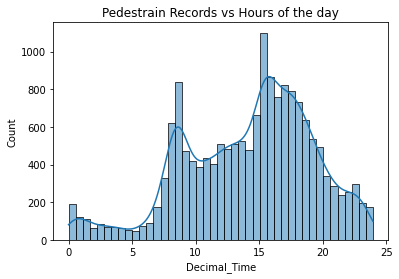

In [107]:
#Visualization of the data
plot_4a=sns.histplot(pedestrain_df, x="Decimal_Time" ,kde=True).set(title='Pedestrain Records vs Hours of the day')

[Text(0.5, 1.0, 'Pedestrain Records vs Days of Week')]

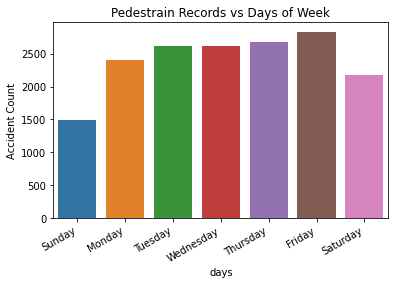

In [108]:
accident_count=[pedestrain_df['Accident_Index'][pedestrain_df['Day_of_Week']==key].count() for key,values in days.items()]
name=[values for key,values in days.items()]
newDf=pd.DataFrame({'days':name,'Accident Count':accident_count})

plot_4b=sns.barplot(x="days",y="Accident Count",data=newDf)
plot_4b.get_figure().autofmt_xdate()
plot_4b.set(title='Pedestrain Records vs Days of Week')

**(d) What impact, if any, does daylight savings have on road traffic accidents in the week after it starts and stops?**

Total Number of Accident Records Occured in a Week after Day light Starts:- 2067


[Text(0.5, 1.0, 'DayLight Start Week Accident Records')]

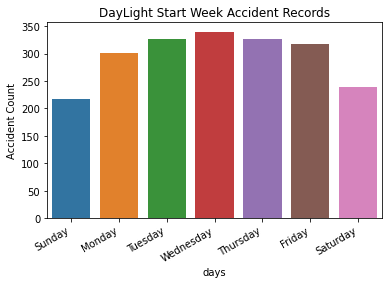

In [109]:
#Daylight Saving Start 31-03-2019 to 06-04-2019
#Creating Day light start week dataframe
daylight_start_week_df=accidents19_df[accidents19_df['Date'].isin(['31/03/2019','01/04/2019','02/04/2019','03/04/2019','04/04/2019','05/04/2019','06/04/2019'])]
daylight_start_week_df
print("Total Number of Accident Records Occured in a Week after Day light Starts:-",len(daylight_start_week_df))

#Visualisation of the Data
accident_count=[daylight_start_week_df['Accident_Index'][daylight_start_week_df['Day_of_Week']==key].count() for key,values in days.items()]
name=[values for key,values in days.items()]
newDf=pd.DataFrame({'days':name,'Accident Count':accident_count})

plot_DayLight_Start_Week_Accident_Records=sns.barplot(x="days",y="Accident Count",data=newDf)
plot_DayLight_Start_Week_Accident_Records.get_figure().autofmt_xdate()
plot_DayLight_Start_Week_Accident_Records.set(title='DayLight Start Week Accident Records')

Total Number of Accident Records Occured in a Week after Day light Ends:- 2214


[Text(0.5, 1.0, 'DayLight End Week Accident Records')]

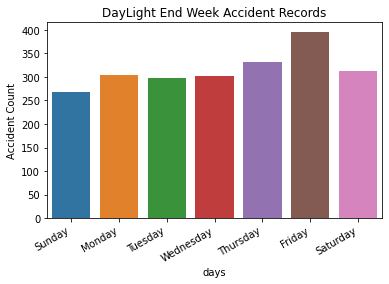

In [110]:
#Daylight Saving End on 27-10-2019 to 06-04-2019
#Creating Daylight End week data frame

daylight_end_week_df=accidents19_df[accidents19_df['Date'].isin(['27/10/2019','28/10/2019','29/10/2019','30/10/2019','31/10/2019','01/11/2019','02/11/2019'])]
print("Total Number of Accident Records Occured in a Week after Day light Ends:-",len(daylight_end_week_df))

#Visualisation of the Data

accident_count=[daylight_end_week_df['Accident_Index'][daylight_end_week_df['Day_of_Week']==key].count() for key,values in days.items()]
name=[values for key,values in days.items()]
newDf=pd.DataFrame({'days':name,'Accident Count':accident_count})

plot_DayLight_End_Week_Accident_Records=sns.barplot(x="days",y="Accident Count",data=newDf)
plot_DayLight_End_Week_Accident_Records.get_figure().autofmt_xdate()
plot_DayLight_End_Week_Accident_Records.set(title='DayLight End Week Accident Records')

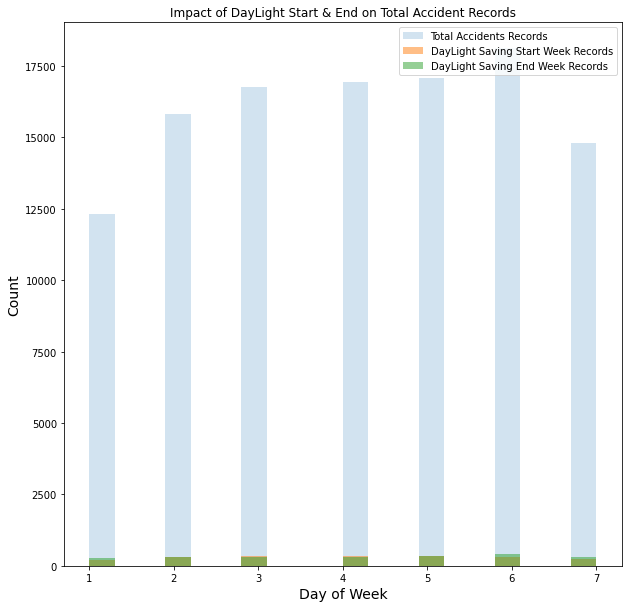

In [111]:

data1=accidents19_df['Day_of_Week']
data2=daylight_start_week_df['Day_of_Week']
data3=daylight_end_week_df['Day_of_Week']
plt.figure(figsize=(10,10))
plt.hist(data1, bins=20, alpha=0.2, label="Total Accidents Records")
plt.hist(data2, bins=20, alpha=0.5, label="DayLight Saving Start Week Records")
plt.hist(data3, bins=20, alpha=0.5, label="DayLight Saving End Week Records")
plt.xlabel("Day of Week", size=14)
plt.ylabel("Count", size=14)
plt.title("Impact of DayLight Start & End on Total Accident Records")
plt.legend(loc='upper right')

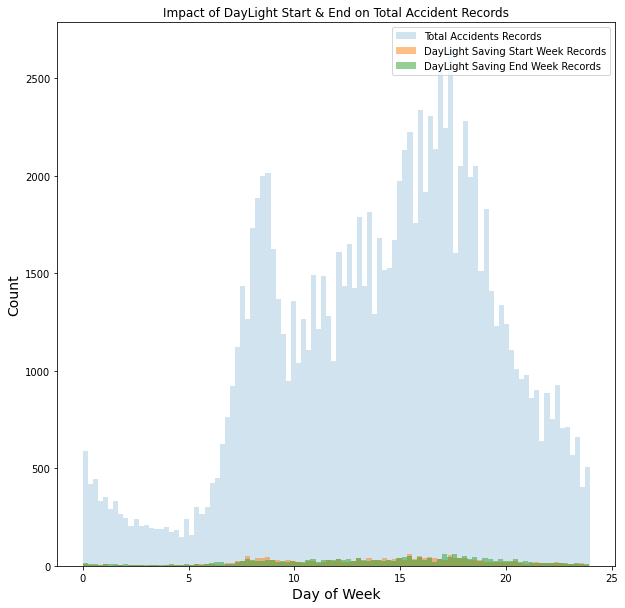

In [112]:
data1=accidents19_df['Decimal_Time']
data2=daylight_start_week_df['Decimal_Time']
data3=daylight_end_week_df['Decimal_Time']
plt.figure(figsize=(10,10))
plt.hist(data1, bins=100, alpha=0.2, label="Total Accidents Records")
plt.hist(data2, bins=100, alpha=0.5, label="DayLight Saving Start Week Records")
plt.hist(data3, bins=100, alpha=0.5, label="DayLight Saving End Week Records")
plt.xlabel("Day of Week", size=14)
plt.ylabel("Count", size=14)
plt.title("Impact of DayLight Start & End on Total Accident Records")
plt.legend(loc='upper right')

**(e) What impact, if any, does sunrise and sunset times have on road traffic accidents?**

In [114]:
city = LocationInfo("London", "England", "Europe/London", 51.5, -0.116)

#Function to Get Sunrise Time from date

def get_sunrise(txtDate):
    s = sun(city.observer, txtDate)
    return((s["sunrise"]))

#Function to Get Sunset Time from date
def get_sunset(txtDate):
    s = sun(city.observer, txtDate)
    return((s["sunset"]))

#Function to Get Sunrise Start Time (-30min)
def sunrise_start_range(txtDate):
    sun_rise_time=get_sunrise(txtDate)
    n = 30
    start_time = sun_rise_time - timedelta(minutes=n)
    return(start_time.time())
    
#Function to Get Sunrise End Time (+30min)
def sunrise_end_range(txtDate):
    sun_rise_time=get_sunrise(txtDate)
    n = 30
    end_time = sun_rise_time + timedelta(minutes=n)
    return(end_time.time())

#Function to Get Sunset Start Time (-30min)
def sunset_start_range(txtDate):
    sun_set_time=get_sunset(txtDate)
    n = 30
    start_time = sun_set_time - timedelta(minutes=n)
    return(start_time.time())

#Function to Get Sunset End Time (+30min)
def sunset_end_range(txtDate):
    sun_set_time=get_sunset(txtDate)
    n = 30
    end_time = sun_set_time + timedelta(minutes=n)
    return(end_time.time())

In [115]:
# Creating New Columns Start range & End Range for Sunrise and Sunset
accidents19_df['Sunrise_Start_Range'] = pd.to_datetime(accidents19_df['Date'])
accidents19_df['Sunrise_Start_Range']=accidents19_df['Sunrise_Start_Range'].apply(sunrise_start_range)

accidents19_df['Sunrise_End_Range'] = pd.to_datetime(accidents19_df['Date'])
accidents19_df['Sunrise_End_Range']=accidents19_df['Sunrise_End_Range'].apply(sunrise_end_range)


accidents19_df['Sunset_Start_Range'] = pd.to_datetime(accidents19_df['Date'])
accidents19_df['Sunset_Start_Range']=accidents19_df['Sunset_Start_Range'].apply(sunset_start_range)

accidents19_df['Sunset_End_Range'] = pd.to_datetime(accidents19_df['Date'])
accidents19_df['Sunset_End_Range']=accidents19_df['Sunset_End_Range'].apply(sunset_end_range)

In [116]:
# Function to get time from String
def gettime(str):
  accident_time=pd.to_datetime(str)
  return accident_time.time()

In [117]:

accidents19_df['Accident_Time'] = pd.to_datetime(accidents19_df['Time'])
accidents19_df['Accident_Time']= accidents19_df['Accident_Time'].apply(gettime)


In [119]:
#Data frame for the accidents occured in Sunrise & Sunset

sunrise_df=accidents19_df[(accidents19_df['Accident_Time']>=accidents19_df['Sunrise_Start_Range']) & (accidents19_df['Accident_Time']<=accidents19_df['Sunrise_End_Range'])]
sunset_df=accidents19_df[(accidents19_df['Accident_Time']>=accidents19_df['Sunset_Start_Range']) & (accidents19_df['Accident_Time']<=accidents19_df['Sunset_End_Range'])]

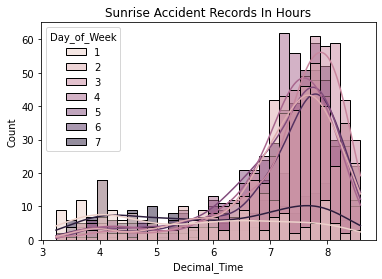

In [120]:
plot_6=sns.histplot(sunrise_df, x="Decimal_Time" ,kde=True,hue="Day_of_Week").set(title='Sunrise Accident Records In Hours')

[Text(0.5, 1.0, 'Sunrise Accident Records In Week')]

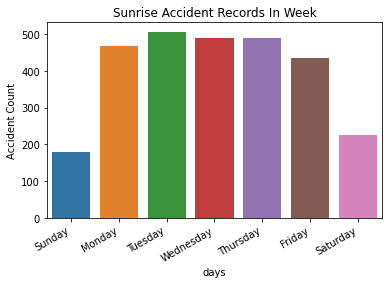

In [121]:
accident_count=[sunrise_df['Accident_Index'][sunrise_df['Day_of_Week']==key].count() for key,values in days.items()]
name=[values for key,values in days.items()]
newDf=pd.DataFrame({'days':name,'Accident Count':accident_count})

plot_6a=sns.barplot(x="days",y="Accident Count",data=newDf)
plot_6a.get_figure().autofmt_xdate()
plot_6a.set(title='Sunrise Accident Records In Week')

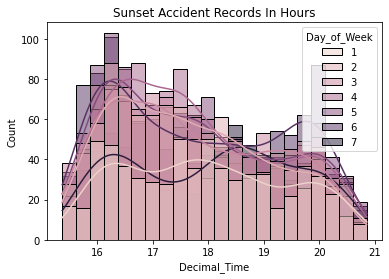

In [122]:
plot_7=sns.histplot(sunset_df, x="Decimal_Time" ,kde=True,hue="Day_of_Week").set(title='Sunset Accident Records In Hours')

[Text(0.5, 1.0, 'Sunset Accident Records In Week')]

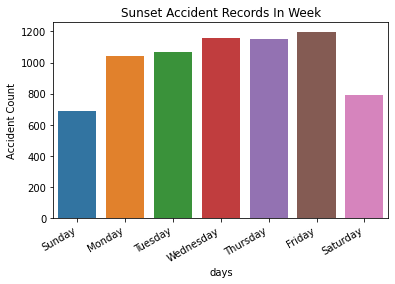

In [123]:
accident_count=[sunset_df['Accident_Index'][sunset_df['Day_of_Week']==key].count() for key,values in days.items()]
name=[values for key,values in days.items()]
newDf=pd.DataFrame({'days':name,'Accident Count':accident_count})

plot_7a=sns.barplot(x="days",y="Accident Count",data=newDf)
plot_7a.get_figure().autofmt_xdate()
plot_7a.set(title='Sunset Accident Records In Week')

In [124]:
print("Total Number of Accidents recorded in Sunrise:", len(sunrise_df))
print("Total Number of Accidents recorded in Sunset:", len(sunset_df))

Total Number of Accidents recorded in Sunrise 2789
Total Number of Accidents recorded in Sunset 7096


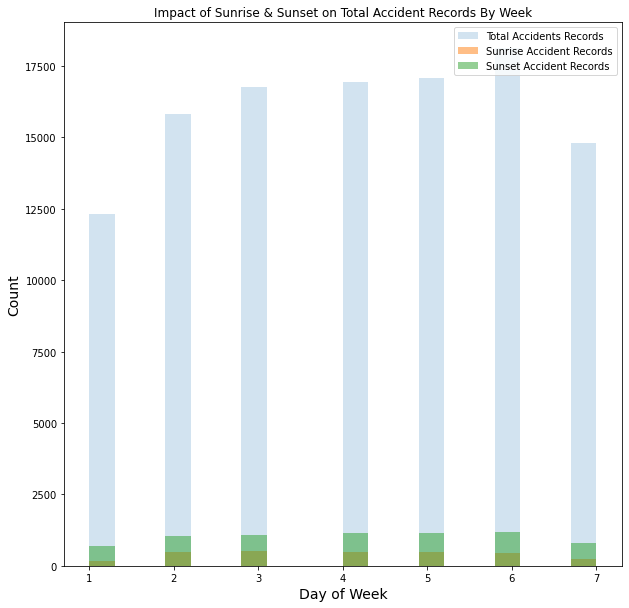

In [125]:
data1=accidents19_df['Day_of_Week']
data2=sunrise_df['Day_of_Week']
data3=sunset_df['Day_of_Week']
plt.figure(figsize=(10,10))
plt.hist(data1, bins=20, alpha=0.2, label="Total Accidents Records")
plt.hist(data2, bins=20, alpha=0.5, label="Sunrise Accident Records")
plt.hist(data3, bins=20, alpha=0.5, label="Sunset Accident Records")
plt.xlabel("Day of Week", size=14)
plt.ylabel("Count", size=14)
plt.title("Impact of Sunrise & Sunset on Total Accident Records By Week")
plt.legend(loc='upper right')

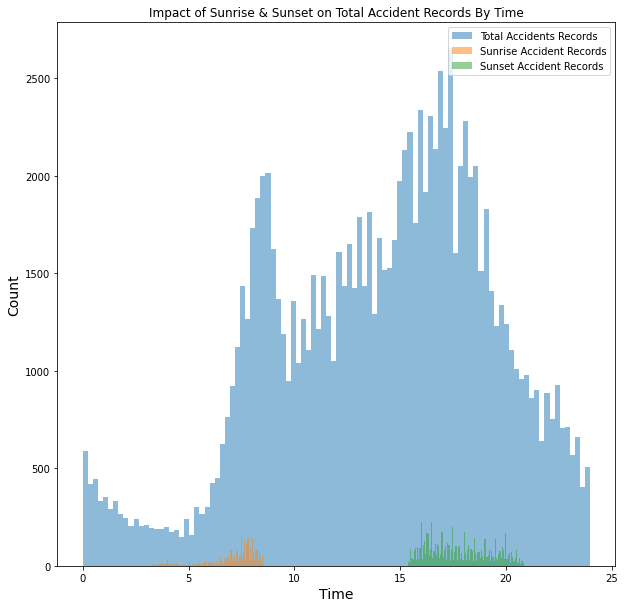

In [126]:
data1=accidents19_df['Decimal_Time']
data2=sunrise_df['Decimal_Time']
data3=sunset_df['Decimal_Time']
plt.figure(figsize=(10,10))
plt.hist(data1, bins=100, alpha=0.5, label="Total Accidents Records")
plt.hist(data2, bins=100, alpha=0.5, label="Sunrise Accident Records")
plt.hist(data3, bins=100, alpha=0.5, label="Sunset Accident Records")
plt.xlabel("Time", size=14)
plt.ylabel("Count", size=14)
plt.title("Impact of Sunrise & Sunset on Total Accident Records By Time")
plt.legend(loc='upper right')

**(f) Are there particular types of vehicles (engine capacity, age of vehicle, etc.) that are more frequently involved in road traffic accidents?**

In [133]:
#Creating data frame by merging Accidents data & Vehicles data
vehicle_type_df=pd.merge(accidents19_df, vehicles19_df, on='Accident_Index', how='inner')
vehicle_type_df.isnull().sum()

Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control                               0
2nd_Road_Class      

[Text(0.5, 1.0, 'Vehicle_Type Impact')]

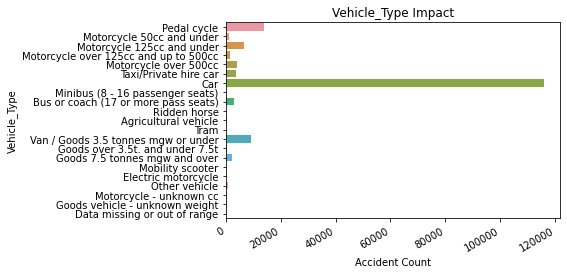

In [134]:
Vehicle_Type={1:"Pedal cycle",2:"Motorcycle 50cc and under",3:"Motorcycle 125cc and under",4:"Motorcycle over 125cc and up to 500cc",5:"Motorcycle over 500cc",
8:"Taxi/Private hire car",9:"Car",10:"Minibus (8 - 16 passenger seats)",11:"Bus or coach (17 or more pass seats)",16:"Ridden horse",17:"Agricultural vehicle",
18:"Tram",19:"Van / Goods 3.5 tonnes mgw or under",20:"Goods over 3.5t. and under 7.5t",21:"Goods 7.5 tonnes mgw and over",22:"Mobility scooter",23:"Electric motorcycle",
90:"Other vehicle",97:"Motorcycle - unknown cc",98:"Goods vehicle - unknown weight",-1:"Data missing or out of range"}
accident_count=[vehicle_type_df['Accident_Index'][vehicle_type_df['Vehicle_Type']==key].count() for key,values in Vehicle_Type.items()]
name=[values for key,values in Vehicle_Type.items()]
newdf=pd.DataFrame({'Vehicle_Type':name,'Accident Count':accident_count})

plot_8=sns.barplot(y="Vehicle_Type",x="Accident Count",data=newdf)
plot_8.get_figure().autofmt_xdate()
plot_8.set(title='Vehicle_Type Impact')

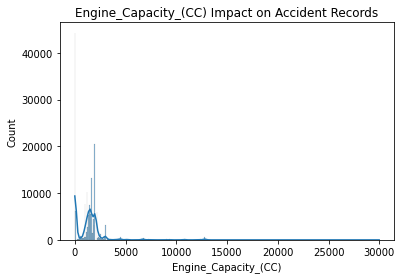

In [135]:
plot_8a=sns.histplot(vehicle_type_df, x="Engine_Capacity_(CC)",kde=True,).set(title='Engine_Capacity_(CC) Impact on Accident Records') 

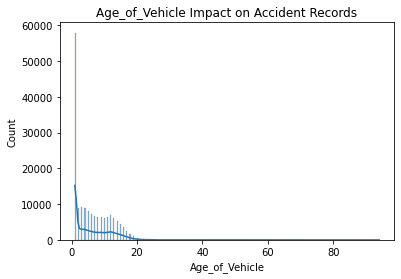

In [136]:
vehicle_type_df['Age_of_Vehicle']=vehicle_type_df['Age_of_Vehicle'].replace(-1,1)
vehicle_type_df['Age_of_Vehicle'].head()
plot_8b=sns.histplot(vehicle_type_df, x="Age_of_Vehicle",kde=True,).set(title='Age_of_Vehicle Impact on Accident Records')

In [137]:
def set_Vehicle_LeftHand_OrNot(txtVal):
  if txtVal==1:
    return "Right"
  elif txtVal==0:
    return "Left"
  else:
    return "Not Available"

vehicle_type_df['Was_Vehicle_Left_Hand_Drive?']=vehicle_type_df['Was_Vehicle_Left_Hand_Drive?'].apply(set_Vehicle_LeftHand_OrNot)
vehicle_type_df['Was_Vehicle_Left_Hand_Drive?']

0         Not Available
1         Not Available
2         Not Available
3         Not Available
4                 Right
              ...      
165597            Right
165598            Right
165599            Right
165600            Right
165601            Right
Name: Was_Vehicle_Left_Hand_Drive?, Length: 165602, dtype: object

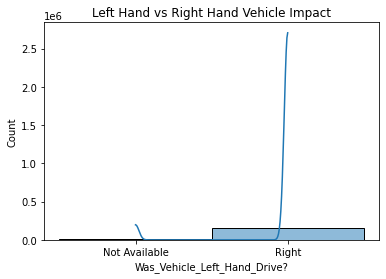

In [138]:
plot_8c=sns.histplot(vehicle_type_df, x="Was_Vehicle_Left_Hand_Drive?",kde=True,).set(title='Left Hand vs Right Hand Vehicle Impact')

**(g) Are there particular conditions (weather, geographic location, situations) that generate more road traffic accidents?**

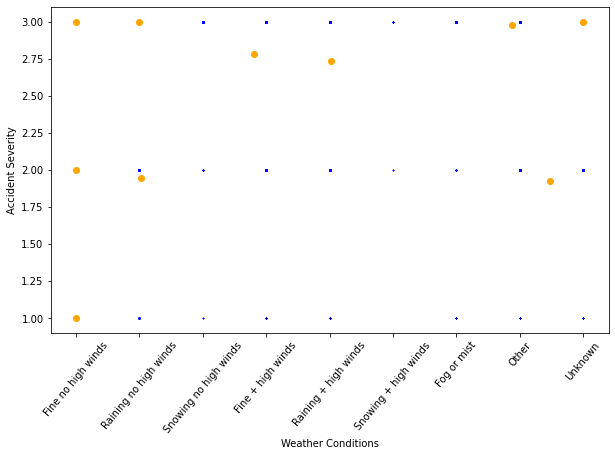

In [139]:
#Weather Conditions Accident Data Check

weather_cond_list = ['Fine no high winds', 'Raining no high winds', 'Snowing no high winds', 'Fine + high winds', 'Raining + high winds',
                'Snowing + high winds', 'Fog or mist', 'Other', 'Unknown']
columns = accidents19_df[['Weather_Conditions', 'Accident_Severity']]

km_algo = KMeans(n_clusters=10, random_state=0).fit(columns)
labels = km_algo.predict(columns)
centroid = km_algo.cluster_centers_
# create a scatter plot
fig = plt.figure(figsize=(10, 6))
plt.xlabel("Weather Conditions")
plt.ylabel("Accident Severity")
colors = map(lambda x:colmap[x+1], labels)

plt.scatter( columns['Weather_Conditions'], columns['Accident_Severity'] , s=0.25, color='blue')
plt.scatter(centroid[:,0], centroid[:,1], color='orange')
plt.xticks([1,2,3,4,5,6,7,8,9], weather_cond_list,rotation=50)
plt.show()
fig.savefig('weather data cluster.png')

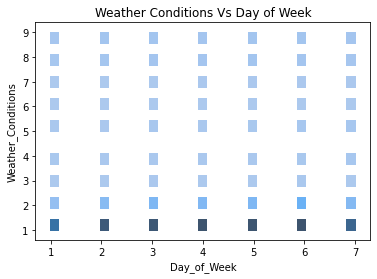

In [51]:
plot_9=sns.histplot(accidents19_df, y="Weather_Conditions",x="Day_of_Week",kde=True,).set(title='Weather Conditions Vs Day of Week')

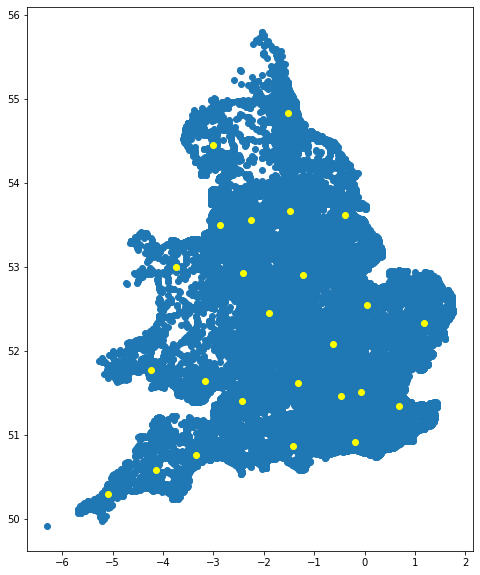

In [140]:
#Geographic Location Accident Data Check

X =accidents19_df[['Longitude','Latitude']]
kmeans = KMeans(n_clusters=25, random_state=0).fit(X)
label=np.unique(kmeans.labels_)

lat=X['Latitude']
longi=X['Longitude']

centroid=kmeans.cluster_centers_
plt.figure(figsize=(8,10))
plt.scatter(longi,lat)
plt.scatter(centroid[:,0],centroid[:,1],color='yellow')
plt.show()

[Text(0.5, 1.0, 'Road Surface Conditions')]

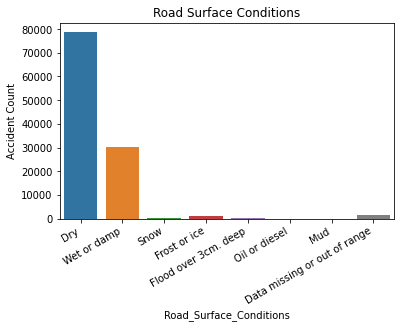

In [143]:
#Situtations Conditions Accident Check
Road_Surface_Conditions={1:"Dry",2:"Wet or damp",3:"Snow",4:"Frost or ice",5:"Flood over 3cm. deep",6:"Oil or diesel",7:"Mud",-1:"Data missing or out of range"}
accident_count=[accidents19_df['Accident_Index'][accidents19_df['Road_Surface_Conditions']==key].count() for key,values in Road_Surface_Conditions.items()]
name=[values for key,values in Road_Surface_Conditions.items()]
newdf=pd.DataFrame({'Road_Surface_Conditions':name,'Accident Count':accident_count})

plot_9a=sns.barplot(x="Road_Surface_Conditions",y="Accident Count",data=newdf)
plot_9a.get_figure().autofmt_xdate()
plot_9a.set(title='Road Surface Conditions')


[Text(0.5, 1.0, 'Light Conditions')]

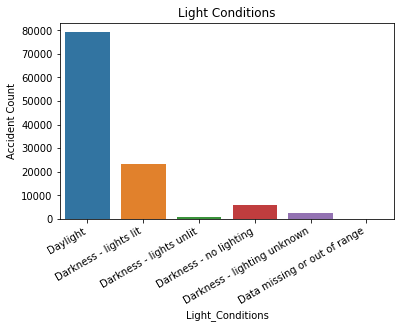

In [144]:
Light_Conditions={1:"Daylight",4:"Darkness - lights lit",5:"Darkness - lights unlit",6:"Darkness - no lighting",7:"Darkness - lighting unknown",-1:"Data missing or out of range",}
accident_count=[accidents19_df['Accident_Index'][accidents19_df['Light_Conditions']==key].count() for key,values in Light_Conditions.items()]
name=[values for key,values in Light_Conditions.items()]

newdf=pd.DataFrame({'Light_Conditions':name,'Accident Count':accident_count})
plot_9b=sns.barplot(x="Light_Conditions",y="Accident Count",data=newdf)
plot_9b.get_figure().autofmt_xdate()
plot_9b.set(title='Light Conditions')

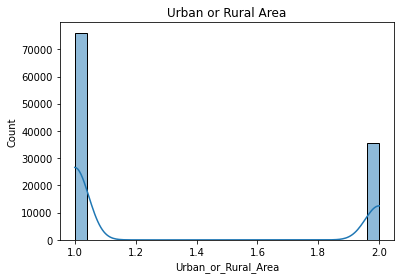

In [145]:
plot_9c=sns.histplot(accidents19_df, x='Urban_or_Rural_Area',kde=True,).set(title='Urban or Rural Area')

[Text(0.5, 1.0, 'Road Type')]

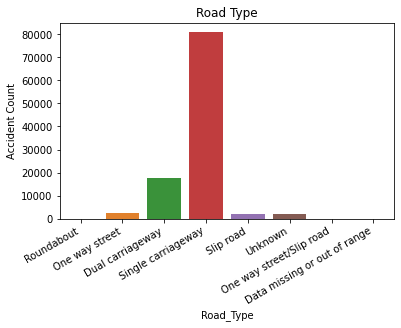

In [146]:
Road_Type={11:"Roundabout",2:"One way street",3:"Dual carriageway",6:"Single carriageway",7:"Slip road",9:"Unknown",12:"One way street/Slip road",-1:"Data missing or out of range"}
accident_count=[accidents19_df['Accident_Index'][accidents19_df['Road_Type']==key].count() for key,values in Road_Type.items()]
name=[values for key,values in Road_Type.items()]
newdf=pd.DataFrame({'Road_Type':name,'Accident Count':accident_count})

plot_9d=sns.barplot(x="Road_Type",y="Accident Count",data=newdf)
plot_9d.get_figure().autofmt_xdate()
plot_9d.set(title='Road Type')

**(h) How does driver related variables affect the outcome (e.g., age of the driver, and the purpose of the journey)?**

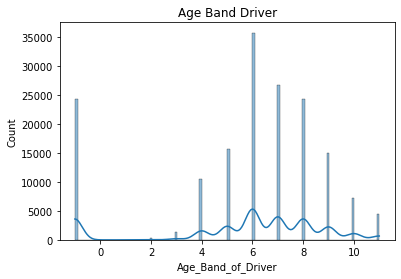

In [147]:
#Age Band of Driver
plot_10c=sns.histplot(vehicle_type_df, x='Age_Band_of_Driver',kde=True).set(title='Age Band Driver')

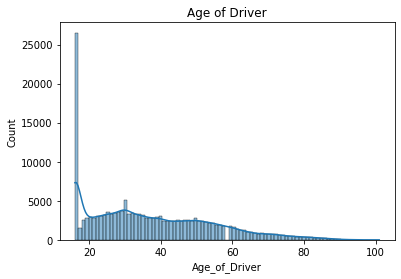

In [148]:
vehicle_type_df.loc[(vehicle_type_df.Age_of_Driver < 16 ),'Age_of_Driver']=16
vehicle_type_df['Age_of_Driver'].unique()

plot_10d=sns.histplot(vehicle_type_df, x='Age_of_Driver',kde=True,).set(title='Age of Driver')

[Text(0.5, 1.0, 'Journey Purpose of the Driver')]

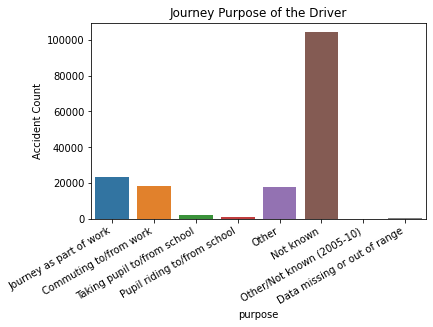

In [150]:
purpose={1:"Journey as part of work",2:"Commuting to/from work",3:"Taking pupil to/from school",4:"Pupil riding to/from school",5:"Other",6:"Not known",15:"Other/Not known (2005-10)",-1:"Data missing or out of range"}
accident_count=[vehicle_type_df['Accident_Index'][vehicle_type_df['Journey_Purpose_of_Driver']==key].count() for key,values in purpose.items()]
name=[values for key,values in purpose.items()]
journey_Purpose_of_Driver_DF=pd.DataFrame({'purpose':name,'Accident Count':accident_count})
journey_Purpose_of_Driver_DF

plot_10e=sns.barplot(x="purpose",y="Accident Count",data=journey_Purpose_of_Driver_DF)
plot_10e.get_figure().autofmt_xdate()
plot_10e.set(title='Journey Purpose of the Driver')

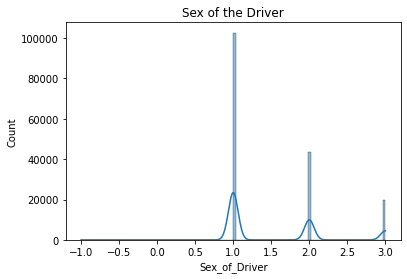

In [152]:
plot_10f=sns.histplot(vehicle_type_df, x='Sex_of_Driver',kde=True,).set(title='Sex of the Driver')

***(i) Can we make predictions about when and where accidents will occur, and the severity of the injuries sustained from the data supplied to improve road safety? How well do our models compare to government models? ***

# **Feature Selection For Model**

Feature Selection helps to remove unwanted columns from model Thus resulting in accuracy of the model

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


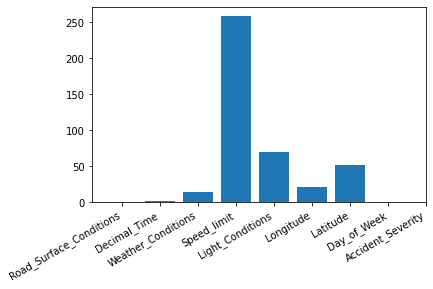

In [153]:


predictors = ['Road_Surface_Conditions','Decimal_Time','Weather_Conditions','Speed_limit','Light_Conditions','Longitude','Latitude','Day_of_Week','Accident_Severity']
usethis = accidents19_df.dropna()
usethis.reset_index(drop=True)
usethis = usethis.filter(predictors,axis=1)
usethisnow=usethis[(usethis['Weather_Conditions']>0) & (usethis['Speed_limit']>0) & (usethis['Road_Surface_Conditions']>0)&(usethis['Light_Conditions']>0)]
selector = SelectKBest(f_classif,k="all")
selector.fit(usethisnow[predictors],usethisnow["Accident_Severity"])
scores = -np.log10(selector.pvalues_)
fig,ax = plt.subplots()
plt.bar(range(len(predictors)),scores)
plt.xticks(range(len(predictors)),predictors)
fig.autofmt_xdate()
plt.savefig('Feature_Extraction.png')
plt.show()


# **Model Implementation**

In [154]:
def get_models():
  models = dict()
  models['Random Forest'] = RandomForestClassifier()
  models['knn'] = KNeighborsClassifier()
  models['Logistic Regression'] = LogisticRegression()
  models['Naive Bayes'] = GaussianNB()
  return models

def get_dataset(Xfeat,y_target_new):
  X_train, X_validation, y_train, y_validation = train_test_split(Xfeat, y_target_new, test_size=.25, random_state=1)
  return X_train, y_train

def eval_model(model,X,y):
  clf=StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  scores = cross_val_score(model, X,y, scoring='accuracy', cv=clf,n_jobs=-1, error_score='raise')
  return scores

def run_models(X_feat,y_target_val):
  #Grab hold of the dataset
  X,y = get_dataset(X_feat, y_target_val)
  #Grab the models to use
  models = get_models()
  #Run and Evaluate the models
  results, names= list(),list()
  result_dict ={}
  for name, model in models.items():
    scores = eval_model(model, X, y)
    results.append(scores)
    names.append(name)
    result_dict[name] = list(scores)
    print('>%s %.3f  (%.3f)'% (name, mean(scores),std(scores)))
  df = pd.DataFrame(result_dict)
  return df

In [155]:
usethis = vehicle_type_df.filter(['Speed_limit','Light_Conditions','Weather_Conditions','Longitude','Latitude','Decimal_Time','Road_Surface_Conditions','Accident_Severity','Day_of_Week'])
usethisnow = usethis[(usethis['Weather_Conditions']>0)& (usethis['Speed_limit']>0) & (usethis['Light_Conditions']>0)]
usethisnow = usethis
y_target = usethisnow['Accident_Severity'].values
Xfeatures = usethisnow.drop ("Accident_Severity", axis=1)
result_df = run_models(Xfeatures,y_target)

>Random Forest 0.911  (0.002)
>knn 0.789  (0.004)
>Logistic Regression 0.806  (0.000)
>Naive Bayes 0.803  (0.001)


# **Conversion of Government Data into Severity Level**

In [72]:
gov_prediction['Govt_Pred_Accident_Severity'] = np.where(gov_prediction['Adjusted_Serious']> gov_prediction['Adjusted_Slight'],2,3)
gov_prediction['Accident_Index'] = gov_prediction['accident_index']
accident_merge_gov = pd.merge(accidents19_df,gov_prediction, on= 'Accident_Index', how ='inner')
gov_prediction

,accident_index,Vehicle_Reference,Casualty_Reference,Adjusted_Serious,Adjusted_Slight,Injury_Based,Govt_Pred_Accident_Severity,Accident_Index
0,200401BS00001,1,1,0.239280,0.760720,0,3,200401BS00001
1,200401BS00002,1,1,1.000000,0.000000,0,2,200401BS00002
2,200401BS00003,1,1,0.057141,0.942859,0,3,200401BS00003
3,200401BS00003,1,2,0.048599,0.951401,0,3,200401BS00003
4,200401BS00004,1,1,0.187000,0.813000,0,3,200401BS00004
...,...,...,...,...,...,...,...,...
3314732,2019984106919,1,1,0.183336,0.816664,0,3,2019984106919
3314733,2019984107019,1,1,0.074588,0.925412,0,3,2019984107019
3314734,2019984107219,2,1,0.048524,0.951476,0,3,2019984107219
3314735,2019984107419,1,1,0.183316,0.816684,0,3,2019984107419


**Accuracy Score of Government Model**

In [75]:
y_true = accident_merge_gov['Accident_Severity']
y_prod = accident_merge_gov['Govt_Pred_Accident_Severity']
accuracy_score(y_true, y_prod)

0.9443050482935005

# **Model to predict Accuracy Score for Severity 2 & 3**

In [76]:
usethis = accident_merge_gov.filter(['Speed_limit','Light_Conditions','Decimal_Time','Weather_Conditions','Longitude','Latitude,','Road_Surface_Conditions','Accident_Severity','Day_of_Week'])
usethisnow = usethis[(usethis['Weather_Conditions']>0)& (usethis['Speed_limit']>0) & (usethis['Light_Conditions']>0)]
y_target = usethisnow['Accident_Severity'].values
Xfeatures = usethisnow.drop ("Accident_Severity", axis=1)
result_df = run_models(Xfeatures,y_target)


>Random Forest 0.842  (0.001)
>knn 0.765  (0.003)
>Logistic Regression 0.779  (0.000)
>Naive Bayes 0.774  (0.002)


In [77]:
result_df

,Random Forest,knn,Logistic Regression,Naive Bayes
0,0.840915,0.763505,0.779013,0.771905
1,0.839493,0.765572,0.779013,0.774102
2,0.841432,0.757302,0.779013,0.773326
3,0.841820,0.768674,0.779013,0.772163
4,0.840915,0.762988,0.779013,0.775911
5,0.840398,0.763892,0.779013,0.776816
6,0.842078,0.764539,0.779013,0.775523
7,0.841561,0.766865,0.778883,0.775265
8,0.843241,0.767511,0.778883,0.773456
9,0.845160,0.765284,0.778984,0.774977
